# Régression OLS et Ridge

## OLS

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

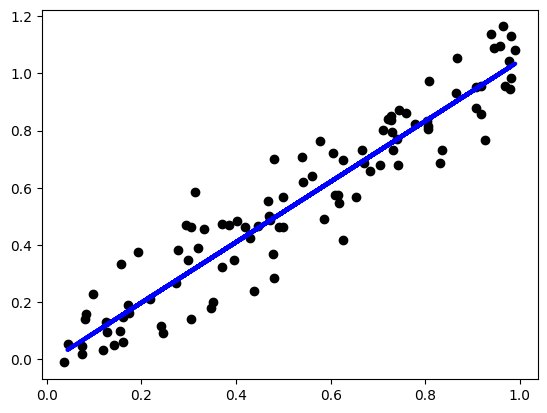

In [48]:
data1 = np.load('data1.npy')
len_data1 = len(data1[0, :])

x = np.array(data1[0, :])
y = np.array(data1[1, :])

x_data = x
y_data = y

# Use only one feature
x_data = x_data[:, np.newaxis]

# Split the data into training/testing sets
x_train = x_data[:-len_data1//2]
x_test = x_data[-len_data1//2:]

# Split the targets into training/testing sets
y_train = y_data[:-len_data1//2]
y_test = y_data[-len_data1//2:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.show()

In [ ]:
erreur_apprentissage = 1 / len_data1 * sum([l_OLS(y, )])

def l_OLS(u, v):
    return (u - v)**2

## Espace de redescription